# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Pipeline classif infox supervisé dataset labels

---

# Observations et environnement
---

In [1]:
random_state = 42

In [2]:
cd ../..

/Volumes/Geek/Work/Patat


In [3]:
import ast
import importlib
import pandas as pd
import seaborn as sns

In [4]:
filename = 'data/prod/230510-OIDS-Label.csv'

In [5]:
df_label = pd.read_csv(filename)
df_label['paragraphs'] = df_label['paragraphs'].apply(ast.literal_eval)
df_label['abstract'].fillna('',inplace=True)

In [6]:
df_label['infox'].isna().sum()

36

In [7]:
df_label = df_label[df_label['infox'].notna()]

In [8]:
df_label.reset_index(inplace=True)

# Experience
---

## Ignore Words

In [9]:
import patat.util.text
import patat.ml.lex_analyser
lex = patat.ml.lex_analyser.LexAnalyser()

### Words

In [10]:
preprocessor = patat.util.text.preprocess
#tokenizer = lex.get_lemmas_from_text
tokenizer = lex.get_words

In [11]:
df_words = lex.get_df_words(texts= df_label['text'],values = df_label['infox'].astype(int), preprocessor=preprocessor, tokenizer= tokenizer)
### Rare Words
for occ_rare in [1,2,3,4,5,6,7]:
    df_words['rare_'+str(occ_rare)]=(df_words['count_0']<=occ_rare)&(df_words['count_1']<=occ_rare)
### Common words
for common_size in [50,80,120,200,500]:
    common_0 = df_words.sort_values('count_0',ascending=False).head(common_size).index
    common_1 = df_words.sort_values('count_1',ascending=False).head(common_size).index
    df_words['common_'+str(common_size)]=(df_words.index.isin(common_0))&(df_words.index.isin(common_1))
### Ignore Lemmas
ignore_words={
    'None' : None,
    'small' : list(df_words[df_words['common_80']].index)+list(df_words[df_words['rare_1']].index),
    'medium' : list(df_words[df_words['common_80']].index)+list(df_words[df_words['rare_2']].index),
    'large' : list(df_words[df_words['common_200']].index)+list(df_words[df_words['rare_5']].index),
    'xlarge' : list(df_words[df_words['common_500']].index)+list(df_words[df_words['rare_7']].index),
}

/opt/homebrew/Caskroom/miniforge/base/envs/p311/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [12]:
df_words

,count_0,count_1,count,rare_1,rare_2,rare_3,rare_4,rare_5,rare_6,rare_7,common_50,common_80,common_120,common_200,common_500
de,23761,33432,57193,False,False,False,False,False,False,False,True,True,True,True,True
la,13334,17797,31131,False,False,False,False,False,False,False,True,True,True,True,True
le,9708,13854,23562,False,False,False,False,False,False,False,True,True,True,True,True
et,9442,14462,23904,False,False,False,False,False,False,False,True,True,True,True,True
les,9065,14380,23445,False,False,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
isoloir,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False
isolements,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False
isolementnous,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False
isolationnistes,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False


In [13]:
ignore_words['small']

['de',
 'la',
 'le',
 'et',
 'les',
 'des',
 'en',
 'un',
 'est',
 'que',
 'du',
 'une',
 'pour',
 'qui',
 'il',
 'dans',
 'par',
 'pas',
 'sur',
 'au',
 'ce',
 'plus',
 'ne',
 'qu',
 'se',
 'avec',
 'ont',
 'sont',
 'nous',
 'mais',
 'vous',
 'son',
 'ou',
 'aux',
 'été',
 'on',
 'comme',
 'elle',
 'cette',
 'je',
 'fait',
 'tout',
 'ces',
 'être',
 'ils',
 'même',
 'si',
 'sa',
 'bien',
 'leur',
 'ses',
 'faire',
 'aussi',
 'pays',
 'contre',
 'sans',
 'était',
 'russie',
 'après',
 'avait',
 'depuis',
 'ans',
 'monde',
 'deux',
 'entre',
 'tous',
 'autres',
 'peut',
 'leurs',
 'cela',
 'selon',
 'non',
 'lampe',
 'anxiétés',
 'rejeta',
 'quadras',
 'arnaqueurs',
 'islamogauchiste',
 'rally',
 'jurisprudences',
 'larguées',
 'kakistocratie',
 'shakespeare',
 'égalitaire',
 'kaki',
 'shangbao',
 'seguir',
 'introuvables',
 'arrogé',
 'écrivons',
 'invraisemblables',
 'scarlett',
 'pinatel',
 'inverti',
 'égalé',
 'introduite',
 'introduits',
 'investies',
 'relativisé',
 'appliquant',

## Crossvalidation

In [14]:
df_label=df_label.sample(frac=1,random_state=random_state)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

In [16]:
X = df_label['text']
y = df_label['infox']

In [17]:
logreg = LogisticRegression(C=5, random_state=random_state, solver='lbfgs', multi_class='ovr', max_iter=1000)
neuralnet = MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(8,8), random_state=random_state)

In [18]:
iw = ignore_words['small']

pipelineLR = Pipeline(steps = [
    ('vectorizer',TfidfVectorizer(preprocessor=preprocessor, tokenizer=None, stop_words=iw)), 
    ('classifier',logreg)
                  ])

pipelineMLPC = Pipeline(steps = [
    ('vectorizer',TfidfVectorizer(preprocessor=preprocessor, tokenizer=None, stop_words=iw)), 
    ('classifier',neuralnet)
                  ])

In [19]:
#classifier = pipelineMLPC
classifier = pipelineLR
scores = cross_validate(classifier, X, y, cv=5,scoring=('roc_auc','f1','accuracy','recall'))
df_scores=pd.DataFrame(scores)
df_scores

,fit_time,score_time,test_roc_auc,test_f1,test_accuracy,test_recall
0,0.512007,0.241099,0.890897,0.731343,0.798883,0.653333
1,0.505836,0.178514,0.879615,0.780822,0.821229,0.760000
2,0.483368,0.216490,0.815406,0.715232,0.759777,0.710526
3,0.562753,0.165776,0.860756,0.750000,0.810056,0.671053
4,0.521259,0.173916,0.875447,0.729927,0.793296,0.657895


<AxesSubplot: xlabel='test_roc_auc', ylabel='test_accuracy'>

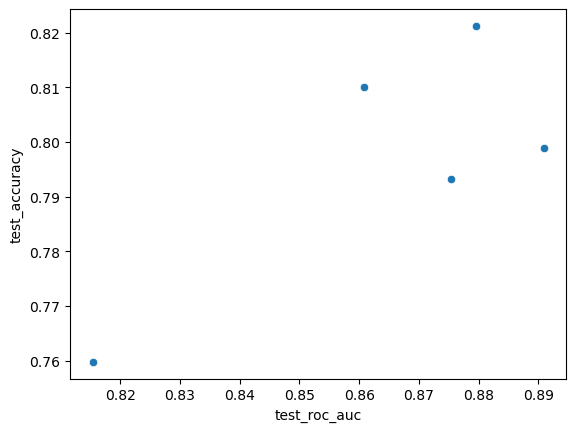

In [20]:
sns.scatterplot(df_scores,x='test_roc_auc',y='test_accuracy')

In [21]:
df_mean = df_scores.describe().loc['mean']

In [22]:
df_mean

fit_time         0.517045
score_time       0.195159
test_roc_auc     0.864424
test_f1          0.741465
test_accuracy    0.796648
test_recall      0.690561
Name: mean, dtype: float64

## Entrainement sur tout le dataset

In [23]:
predictor = pipelineLR
predictor.fit(df_label['text'], df_label['infox'])

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(preprocessor=<function preprocess at 0x1042734c0>,
                                 stop_words=['de', 'la', 'le', 'et', 'les',
                                             'des', 'en', 'un', 'est', 'que',
                                             'du', 'une', 'pour', 'qui', 'il',
                                             'dans', 'par', 'pas', 'sur', 'au',
                                             'ce', 'plus', 'ne', 'qu', 'se',
                                             'avec', 'ont', 'sont', 'nous',
                                             'mais', ...])),
                ('classifier',
                 LogisticRegression(C=5, max_iter=1000, multi_class='ovr',
                                    random_state=42))])

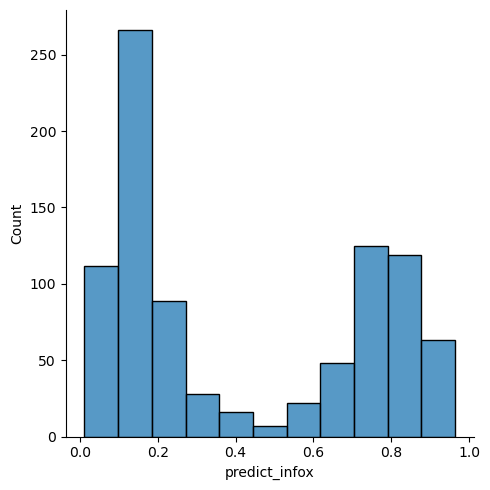

In [24]:
df_label['predict_infox']=predictor.predict_proba(df_label['text'])[:,1]
sns.displot(df_label,x='predict_infox')

# Sauvegarde des résultats
---

In [25]:
import patat.util.file

In [26]:
patat.util.file.pickle_save(predictor,'data/prod/230510-LogRegInfox.pickle')

# Conclusions
---

# Bricolages
---

In [27]:
p2 = patat.util.file.pickle_load('data/prod/230510-LogRegInfox.pickle')